# Using the MNIST Dataset to recognize digits

In [5]:
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import gzip
import pickle

In [6]:
def toProbs(i):
    probabilities = np.zeros((10,1))
    probabilities[i] = 1
    return probabilities

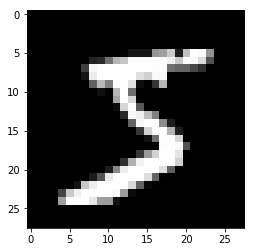

In [7]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='iso-8859-1')

train_x, train_y = train_set

test_x, test_y = test_set

#print(np.shape(train_y))

np.reshape(train_y,(50000,1))

#print(np.shape(train_y))

test_y = []

for x in train_y:
    test_y = np.append(test_y, toProbs(x))
    
#print(np.shape(test_y))
test_y = np.reshape(test_y, (50000,10))
#print(np.shape(test_y))



plt.imshow(train_x[0].reshape((28, 28)), cmap=cm.Greys_r)
plt.show()


In [81]:
#input array
x = []

#expected output
y = []

#Learning rate
lr = 0.001

In [116]:
#create a neural network class
class nn(object):
    def __init__ (self):
        self.inSize = train_x.shape[1]
        self.hiddenSize = 256
        self.outSize = 10
            
        #randomly initialize the weights
        self.ihW = np.random.standard_normal((self.inSize, self.hiddenSize))
        #np.reshape(self.ihW,(1,self.inSize*self.hiddenSize))
        
        #self.ihW = np.random.random_sample(self.inSize*self.hiddenSize)
        #self.ihW[::2] *= -1
        #self.ihW = np.reshape(self.ihW,(self.inSize,self.hiddenSize))
        #print(self.ihW)
                
        self.hBias = np.random.rand(1,self.hiddenSize)
        self.hBias[::2] *= 1
        
        self.hoW = np.random.standard_normal((self.hiddenSize, self.outSize))
        
        #self.hoW = np.random.random_sample(self.hiddenSize*self.outSize)
        #self.hoW[::2] *= -1
        #self.hoW = np.reshape(self.hoW,(self.hiddenSize,self.outSize))
        
        self.oBias = np.random.rand(1,self.outSize)
        self.oBias[::2] *= -1
        
    def forwardprop(self, inp):
        self.zt = np.dot(inp, self.ihW)
        #print("zt")
        #print(self.zt)
        self.z = self.zt + self.hBias
        #print("z")
        #print((self.z))
        self.z2 = self.sigmoid(self.z)
        #print("z2")
        #print((self.z2))
        #print("hoW")
        #print(self.hoW)
        # for some reason all the rows become the same
        self.z3t = np.dot(self.z2, self.hoW)
        #print("z3t")
        #print((self.z3t))
        self.z3 = self.z3t + self.oBias
        #print("z3")
        #print((self.z3))
        final = self.sigmoid(self.z3)
        #print("final")
        #print((final))
        return final
    
    def sigmoid(self,z):
        return (1 / (1 + np.exp(-z)))
    
    def sigmoid_prime(self,z):
        return z*(1-z)
    
    def backprop(self, diff, output, x):
        #print(output)
        self.delta = diff*self.sigmoid_prime(output)
        #print(np.shape(self.delta))
        #print(np.shape(self.sigmoid_prime(output)))
        #print(np.shape(diff))
        #print(np.shape(self.sigmoid_prime(output)))
        self.zSquareError = np.dot(self.delta, self.hoW.T)
        self.deltaZSquare = self.zSquareError*self.sigmoid_prime(self.z2)
        self.ihW -= x.T.dot(self.deltaZSquare)*lr
        self.hoW -= self.z2.T.dot(self.delta)*lr
        self.hBias -= np.sum(self.deltaZSquare, axis = 0, keepdims = True)*lr
        self.oBias -= np.sum(self.delta, axis = 0, keepdims = True)*lr
        
        
    def cost(self,yhat,y):
        temp = y*np.log(yhat)+(1-y)*np.log(1-yhat)
        j = (-(1/np.size(y))*np.sum(temp))
        print(j)
        return j


In [117]:
def guess(output):
    return np.argmax(output)

In [120]:
yProb = []

for x in train_y:
    yProb = np.append(yProb,toProbs(x))

In [118]:
yhat = []

for i in range(0,1000):
    #outputTest = []
    NeuralNet = nn()
    output = NeuralNet.forwardprop(train_x)
    #for z in range (0, ((train_x).shape[0])):
    #    outputTest = NeuralNet.forwardprop(train_x[z])
    
    #print("output:")
    #print(output)
    #print("test output:")
    #print(outputTest)
    #print(np.shape(output))
    
    #denominator = np.sum(output,axis = 1)
    #denominator = np.reshape(denominator,(50000,1))
    #output = output/denominator
     
    #print(np.shape(output))
    #print(output)
    #print(np.shape(output))
    yhat = output.max(axis=1)
    #print(np.shape(yhat))
    #y = np.append(y, train_y[i])
    #yProb = toProbs(train_y[i])
    #difference = train_y-yhat
    #difference = test_y - output
    #print(np.sum(np.abs(difference)))
    difference = NeuralNet.cost(output,yProb)
    #difference = yProb - output
    NeuralNet.backprop(difference, output, train_x)
    print(i)
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in multiply


nan
0
inf


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in multiply


1
inf
2
inf
3


KeyboardInterrupt: 

In [70]:
#try to predict
test = NeuralNet.forwardprop(train_x[0])
print(test)
yhatTest = guess(test)
print("Guess is: ")
print(yhatTest)
print("Actual is: ")
print(train_y[0])


test = []
for x in range(0,10000):
    predictTest = guess(NeuralNet.forwardprop(test_x[x]))
    test = np.append(test,predictTest)
    

[[4.09808085e-09 3.74470098e-03 3.63456555e-01 7.16855698e-06
  1.93987289e-08 9.99641777e-01 8.06619097e-06 9.99999953e-01
  8.16172883e-06 8.60538879e-01]]
Guess is: 
7
Actual is: 
5


In [83]:
prediction = []

#check accuracy:
for row in output:
    prediction = np.append(prediction,guess(row))

print(prediction)
print(test)

[0. 0. 2. ... 0. 0. 6.]
[5. 5. 5. ... 5. 7. 5.]


In [84]:
accuracy = 0
count = 0
count7= 0

for x in range(0,np.size(prediction)):
    if prediction[x] == 7:
        count7+=1
    if prediction[x] == train_y[x]:
        accuracy += 1
    else:
        continue
        
for x in range(0,np.size(test)):
    if test[x] == train_y[x]:
        count +=1

accuracy = accuracy / 50000

In [86]:
print (accuracy)
print(count/10000)
print(count7)

0.09842
0.0933
15
